## Bike Sharing Assignment

## Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**

In [522]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [523]:
import numpy as np
import pandas as pd

In [524]:
day = pd.read_csv("day.csv")
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualization

#### Perform EDA to understand various variables

In [525]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Column Details
- **instant:** record index
- **dteday :** date
- **season :** season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr :** year (0: 2018, 1:2019)
- **mnth :** month ( 1 to 12)
- **holiday :** weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday :** day of the week
- **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit :** 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp :** temperature in Celsius
- **atemp :** feeling temperature in Celsius
- **hum :** humidity
- **windspeed :** wind speed
- **casual :** count of casual users
- **registered :** count of registered users
- **cnt :** count of total rental bikes including both casual and registered

In [526]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [527]:
day.instant.nunique()

730

In [528]:
day.dteday.nunique()

730

#### Checking the correlation between variables

We'll visualise our data using `matplotlib` and `seaborn`.

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [530]:
day.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


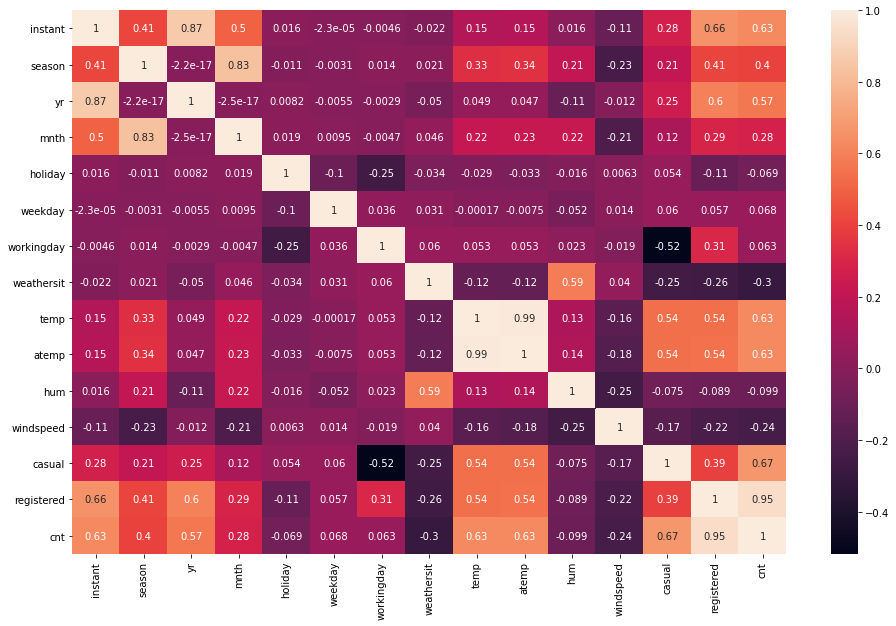

In [531]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True)
plt.show()

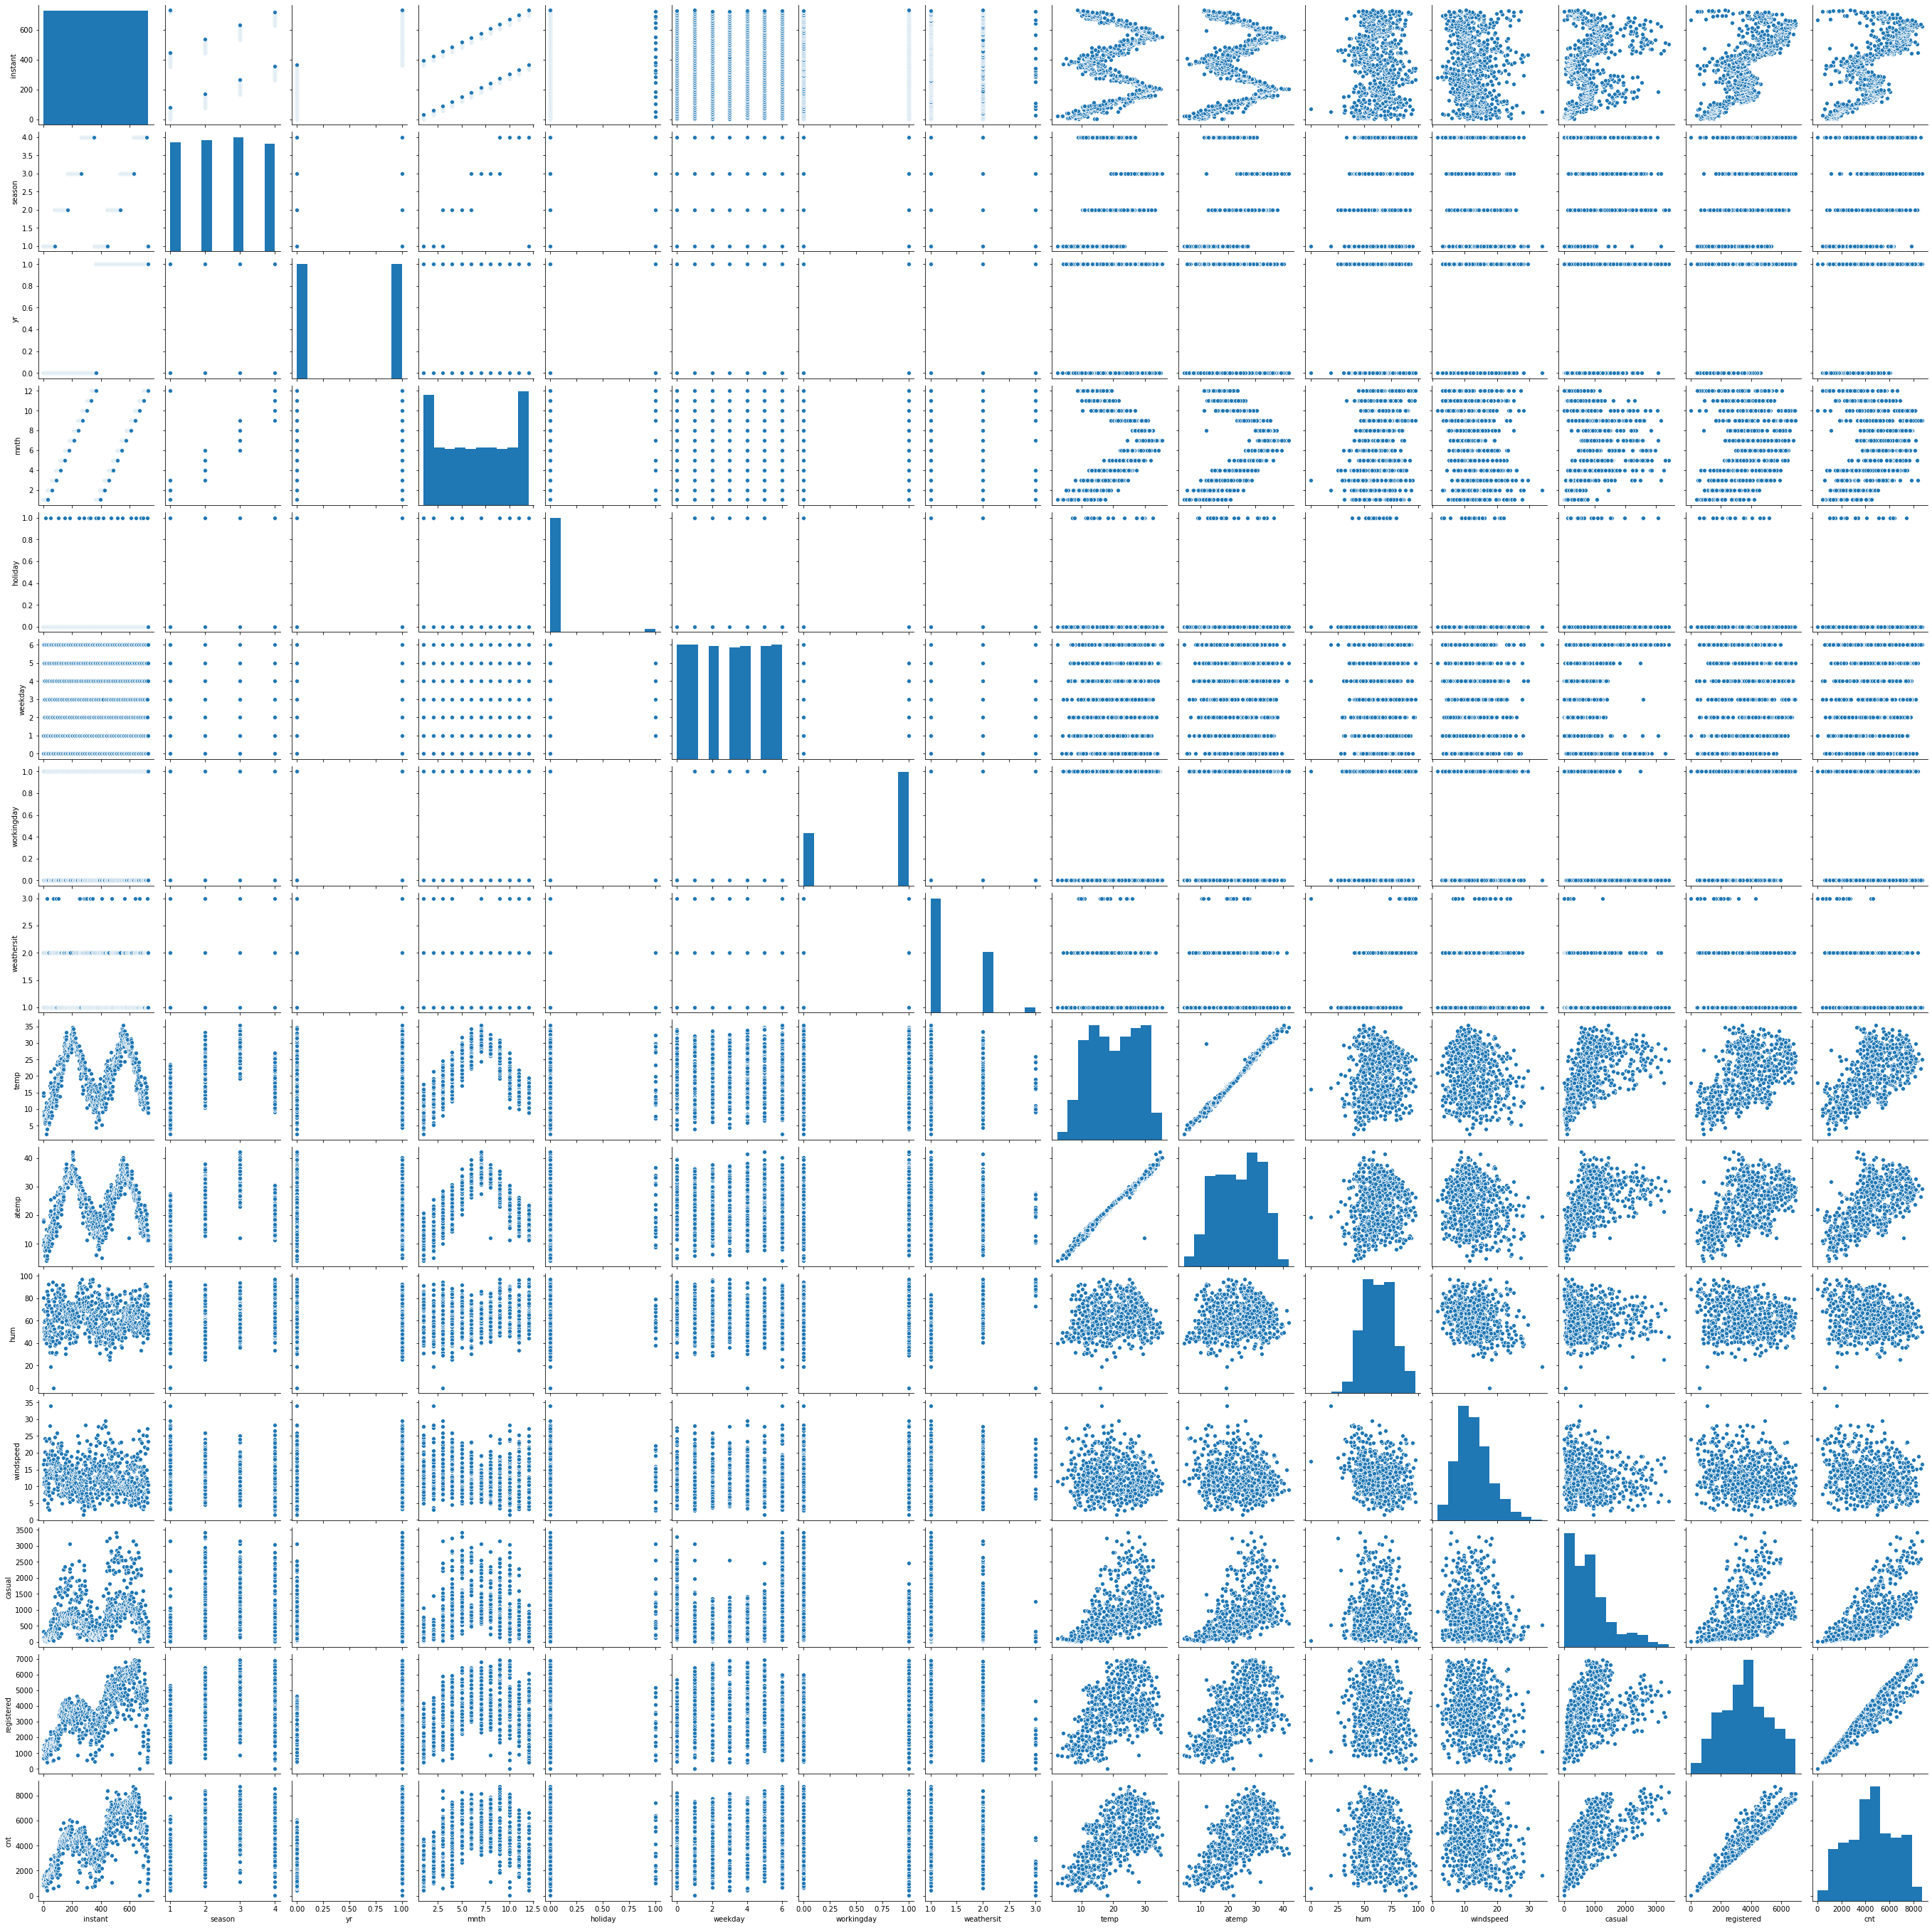

In [532]:
sns.pairplot(day)
plt.show()

In [533]:
def darwPlots(df, arr):
    size = 1 if len(arr)%3 == 1 else 0
    rows = int(len(arr)/3) + size
    height = 8 * rows
    plt.figure(figsize=(20, height))
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 3, idx)
        sns.boxplot(x = val, y = 'cnt', data = df)

    plt.tight_layout()
              

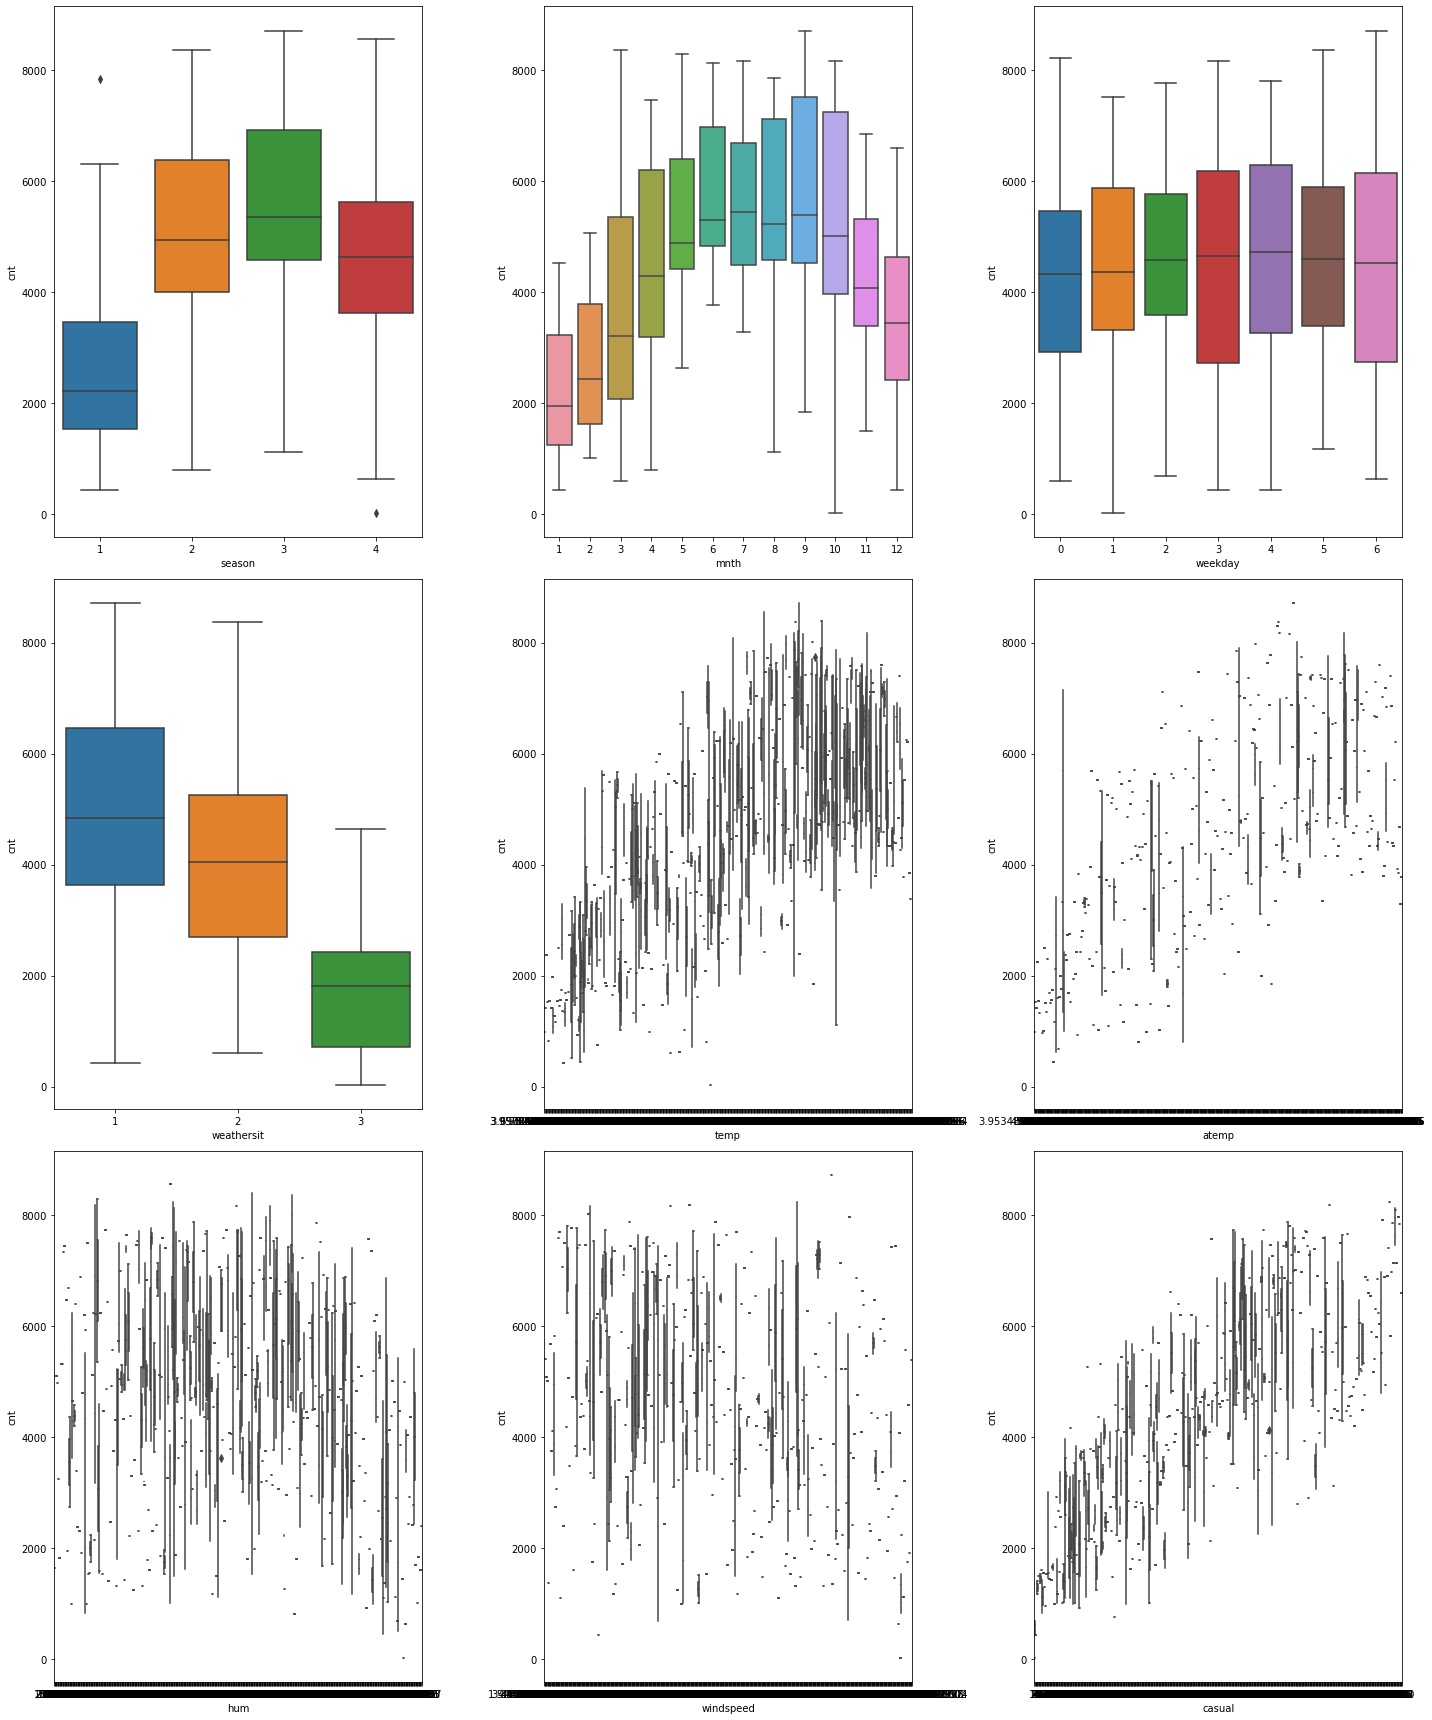

In [534]:
darwPlots(day, ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum','windspeed', 'casual'])

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Preparation:

### checking categorical variables as per Dataset characteristics

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [535]:
# Categorical variables 'season' , 'mnth', 'weekday', 'weathersit' 

categorical_list =  ['season' , 'mnth', 'weekday', 'weathersit']
day[categorical_list].head()

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1


### convert the above numeric variables into respective category values

In [536]:
season_dict = {1:'spring', 2:'summer', 3:'fall',4:'winter'}

month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

week_of_day_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

weathersit_dict = {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4: 'Heavy Rain'}

# Applying the function to the housing list
day['season'] = day['season'].apply(lambda x : season_dict[x])
day['mnth'] = day['mnth'].apply(lambda x : month_dict[x])
day['weekday'] = day['weekday'].apply(lambda x : week_of_day_dict[x])
day['weathersit'] = day['weathersit'].apply(lambda x : weathersit_dict[x])
day[categorical_list].head()

,season,mnth,weekday,weathersit
0,spring,Jan,Saturday,Mist + Cloudy
1,spring,Jan,Sunday,Mist + Cloudy
2,spring,Jan,Monday,Clear
3,spring,Jan,Tuesday,Clear
4,spring,Jan,Wednesday,Clear


## Dummy Variables

Create Dummy Variables for all categorical variables

In [537]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_cagetory'
season_cagetory = pd.get_dummies(day['season'])

# Check what the dataset 'season_cagetory' looks like
season_cagetory.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [538]:
# Let's drop the first column from 'season' df using 'drop_first = True'
season_cagetory = pd.get_dummies(day['season'], drop_first = True)

# Check what the dataset 'season_cagetory' looks like
season_cagetory.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [539]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_cagetory'
mnth_cagetory = pd.get_dummies(day['mnth'])

# Check what the dataset 'mnth_cagetory' looks like
mnth_cagetory.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [540]:
# Let's drop the first column from 'mnth' df using 'drop_first = True'
mnth_cagetory = pd.get_dummies(day['mnth'], drop_first = True)

# Check what the dataset 'mnth_cagetory' looks like
mnth_cagetory.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [541]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_cagetory'
weekday_cagetory = pd.get_dummies(day['weekday'])

# Check what the dataset 'weekday_cagetory' looks like
weekday_cagetory.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [542]:
# Let's drop the first column from 'weekday' df using 'drop_first = True'
weekday_cagetory = pd.get_dummies(day['weekday'], drop_first = True)

# Check what the dataset 'weekday_cagetory' looks like
weekday_cagetory.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [543]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_cagetory'
weathersit_cagetory = pd.get_dummies(day['weathersit'])

# Check what the dataset 'weathersit_cagetory' looks like
weathersit_cagetory.head()

,Clear,Light Snow,Mist + Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [544]:
# Let's drop the first column from 'weathersit' df using 'drop_first = True'
weathersit_cagetory = pd.get_dummies(day['weathersit'], drop_first = True)

# Check what the dataset 'weathersit_cagetory' looks like
weathersit_cagetory.head()

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### Merge all Categorical variables dataframes with orginal dataframe

In [545]:
# Add the results to the original day dataframe

day = pd.concat([day, season_cagetory, mnth_cagetory, weekday_cagetory, weathersit_cagetory], axis = 1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


### Drop all Categorical variables

In [546]:
# Drop all Categorical variables 'season' , 'mnth', 'weekday', 'weathersit'  as we have created the dummies for it

day.drop(categorical_list, axis = 1, inplace = True)
day.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [547]:
# Drop 'instant','dteday' unquie values

varlist =  ['instant','dteday']

day.drop(varlist, axis = 1, inplace = True)

day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


#### Three columns named 'casual', 'registered', and 'cnt'
    1. 'casual' indicates the number casual users who have made a rental
    2. 'registered' on the other hand shows the total number of registered users who have made a booking on a given day
    3. 'cnt' variable indicates the total number of bike rentals, including both casual and registered

### The model should be built taking this 'cnt' as the target variable.

In [548]:
# Drop 'casual','registered' unused variables for this scenario
varlist =  ['casual','registered']

day.drop(varlist, axis = 1, inplace = True)

day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [549]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [550]:
print(day_train.shape)
print(day_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features
For Rescaling the feature, We will use MinMax scaling.

In [551]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [552]:
# Apply scaler() to all the numeric columns 
num_vars = ['temp', 'atemp', 'hum','windspeed', 'cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [553]:
day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [554]:
day_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
yr,1.000000,-0.014980,0.031808,0.107288,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,...,-0.018790,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,...,-0.005387,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-2.815377e-02,-0.038279
workingday,0.031808,-0.233863,1.000000,0.067787,0.067811,0.031989,-0.043176,0.092320,-0.037932,0.043274,...,-0.041271,0.019495,0.174565,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501,2.115873e-02,0.040766
temp,0.107288,-0.066282,0.067787,1.000000,0.989537,0.155415,-0.187396,0.643517,-0.605988,0.125582,...,-0.018709,0.207457,-0.032126,-0.042274,-0.017048,2.826576e-03,0.046646,0.029363,-3.609266e-02,-0.090161
atemp,0.104206,-0.070640,0.067811,0.989537,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,...,-0.005262,0.206157,-0.025143,-0.043452,-0.013902,6.331940e-03,0.049470,0.027900,-4.426553e-02,-0.086069
hum,-0.084792,-0.029093,0.031989,0.155415,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,...,0.162014,0.152628,0.022612,-0.040521,0.012224,-3.822174e-02,0.010123,0.047185,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,...,-0.018973,-0.121734,-0.004372,0.049356,-0.001221,-4.353283e-03,-0.005849,-0.019567,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,0.092320,0.643517,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,...,0.065692,0.201327,-0.009552,-0.016215,-0.063385,9.709936e-03,0.031883,0.025216,-2.265984e-01,-0.175530
spring,-0.036320,0.053339,-0.037932,-0.605988,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,...,-0.174161,-0.167580,-0.009212,0.022641,0.003276,6.274901e-03,-0.030988,-0.008680,-4.455809e-02,0.013970
summer,0.013856,-0.063232,0.043274,0.125582,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,...,-0.175089,-0.168473,0.001623,-0.017169,-0.011612,-2.234951e-02,0.021300,0.039248,-4.523062e-02,0.039442


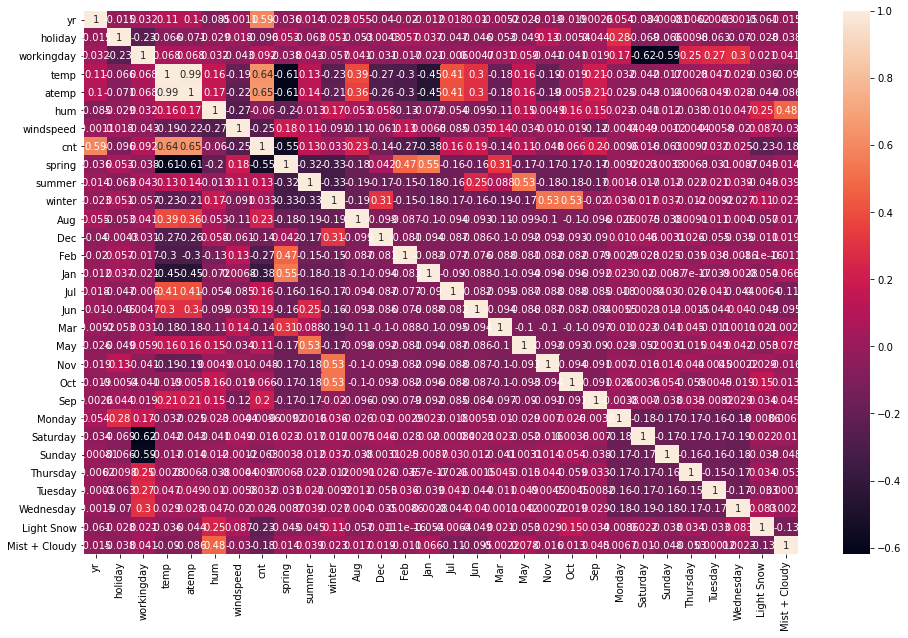

In [555]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day_train.corr(), annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [556]:
y_train = day_train.pop('cnt')
X_train = day_train

In [557]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Model Building

### Adding all the variables to the model

In [558]:
# Check all the columns of the dataframe

X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [559]:
#Build a linear model

import statsmodels.api as sm


In [560]:
def call_OLS_Summay(y, X):
    X_train_lm = sm.add_constant(X)
    lm = sm.OLS(y, X_train_lm).fit()

    print(lm.params)
    print(lm.summary())    
    return X_train_lm, lm;

In [561]:
X_train_lm, lm = call_OLS_Summay(y_train, X_train)

const            0.245237
yr               0.232208
holiday          0.010689
workingday       0.096962
temp             0.401322
atemp            0.050628
hum             -0.151812
windspeed       -0.184388
spring          -0.048580
summer           0.038216
winter           0.105387
Aug              0.016076
Dec             -0.045572
Feb             -0.032176
Jan             -0.062565
Jul             -0.039277
Jun             -0.001704
Mar              0.001288
May              0.024691
Nov             -0.041783
Oct              0.007695
Sep              0.081806
Monday          -0.021502
Saturday         0.096059
Sunday           0.041527
Thursday        -0.009750
Tuesday         -0.019308
Wednesday       -0.005733
Light Snow      -0.256697
Mist + Cloudy   -0.061030
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [562]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [563]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def check_VIF_Values(X_df): 
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
check_VIF_Values(X_train)

         Features    VIF
2      workingday  85.60
3            temp  67.12
4           atemp  56.09
22       Saturday  19.72
23         Sunday  18.35
7          spring  10.80
9          winter   9.52
8          summer   8.31
18            Nov   6.80
19            Oct   6.59
10            Aug   6.54
13            Jan   5.90
14            Jul   5.70
11            Dec   5.68
20            Sep   4.96
1         holiday   4.51
12            Feb   4.39
16            Mar   3.47
15            Jun   2.88
17            May   2.24
5             hum   2.05
21         Monday   1.98
26      Wednesday   1.94
24       Thursday   1.83
25        Tuesday   1.80
28  Mist + Cloudy   1.60
6       windspeed   1.30
27     Light Snow   1.30
0              yr   1.06


## Dropping highly correlated variables and insignificant variables:
- P-Value : **Mar - 0.958**
- VIF :  **workingday - 85.60**

We are taking **High P-Value** - ***Mar*** for dropping from X train dataframe

In [564]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('Mar', 1)
call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.245882
yr               0.232205
holiday          0.010832
workingday       0.097132
temp             0.401114
atemp            0.050432
hum             -0.151648
windspeed       -0.184463
spring          -0.048077
summer           0.037951
winter           0.105660
Aug              0.015479
Dec             -0.046689
Feb             -0.033446
Jan             -0.063879
Jul             -0.039839
Jun             -0.002127
May              0.024301
Nov             -0.042799
Oct              0.006720
Sep              0.081100
Monday          -0.021491
Saturday         0.096239
Sunday           0.041679
Thursday        -0.009714
Tuesday         -0.019305
Wednesday       -0.005727
Light Snow      -0.256696
Mist + Cloudy   -0.061037
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  

#### Dropping next highly correlated variables and insignificant variables
- P-Value : **Jun - 0.929**
- VIF :  **workingday - 85.60**

We are taking **High P-Value** - ***Jun*** for dropping from X train dataframe

In [565]:
X = X.drop('Jun', 1)
X_train_lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.245637
yr               0.232283
holiday          0.010909
workingday       0.097066
temp             0.397364
atemp            0.052089
hum             -0.151307
windspeed       -0.184183
spring          -0.047299
summer           0.038517
winter           0.106093
Aug              0.017262
Dec             -0.046511
Feb             -0.033608
Jan             -0.064184
Jul             -0.037940
May              0.025131
Nov             -0.042402
Oct              0.007389
Sep              0.082508
Monday          -0.021540
Saturday         0.096108
Sunday           0.041554
Thursday        -0.009717
Tuesday         -0.019285
Wednesday       -0.005768
Light Snow      -0.256702
Mist + Cloudy   -0.061070
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:             

## RFE(Recursive Feature Elimination)

In [566]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [567]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

### First **15** variables in RFE for Feature Selection

In [568]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [569]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', False, 10),
 ('May', False, 15),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [570]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [571]:
col = X_train.columns[~rfe.support_]
col

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [572]:
X = X_train.drop(col, 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.251042
yr               0.230502
holiday         -0.058529
workingday       0.043521
temp             0.509836
hum             -0.154716
windspeed       -0.185956
spring          -0.050806
summer           0.049660
winter           0.094426
Jan             -0.034326
Jul             -0.053193
Sep              0.081186
Saturday         0.053721
Light Snow      -0.248777
Mist + Cloudy   -0.057824
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.31e-191
Time:                        22:10:21   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:   

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : There is no P-Value variables ***> 0.05***
- **VIF**     :  **hum  - 29.40**

We are taking **High VIF(>5)** - ***hum*** for dropping from X train dataframe

In [573]:
X = X.drop('hum', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.173663
yr               0.234361
holiday         -0.056199
workingday       0.046502
temp             0.472823
windspeed       -0.156264
spring          -0.059704
summer           0.043352
winter           0.079699
Jan             -0.038947
Jul             -0.048222
Sep              0.075318
Saturday         0.058434
Light Snow      -0.291727
Mist + Cloudy   -0.082621
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          7.33e-189
Time:                        22:10:21   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BI

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : There is no P-Value variables ***> 0.05***
- **VIF**     :  **temp  7.07**

We are taking **High VIF(>5)** - ***temp*** for dropping from X train dataframe

In [574]:
X = X.drop('temp', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.544807
yr               0.247764
holiday         -0.057113
workingday       0.048020
windspeed       -0.187831
spring          -0.260282
summer          -0.044001
winter          -0.074896
Jan             -0.102448
Jul             -0.009855
Sep              0.070843
Saturday         0.056390
Light Snow      -0.304452
Mist + Cloudy   -0.089625
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          4.04e-154
Time:                        22:10:21   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                        

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***holiday - 0.077***
- **VIF**     :  There is no VIF variables ***>5***

We are taking **High P-Value(>0.05)** - ***holiday*** for dropping from X train dataframe

In [575]:
X = X.drop('holiday', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.536795
yr               0.247961
workingday       0.056493
windspeed       -0.188821
spring          -0.261201
summer          -0.043683
winter          -0.075820
Jan             -0.103048
Jul             -0.008760
Sep              0.068895
Saturday         0.064957
Light Snow      -0.303273
Mist + Cloudy   -0.089097
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.54e-154
Time:                        22:10:22   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:      

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***Jul - 0.683***
- **VIF**     :  There is no VIF variables ***>5***

We are taking **High P-Value(>0.05)** - ***Jul*** for dropping from X train dataframe

In [576]:
X = X.drop('Jul', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.533414
yr               0.247992
workingday       0.056660
windspeed       -0.188736
spring          -0.258069
summer          -0.040579
winter          -0.072862
Jan             -0.103085
Sep              0.071353
Saturday         0.065027
Light Snow      -0.303393
Mist + Cloudy   -0.088820
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.30e-155
Time:                        22:10:22   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11    

In [577]:
X.columns.size

11

### No. of independent Variables Should be <= 10. But we have 11 variables now
#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***summer - 0.005***
- **VIF**     :  ***windspeed - 4.04***

We are taking **High VIF** still it's < 0.05 - ***windspeed*** for dropping from X train dataframe

In [578]:
X = X.drop('windspeed', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.482085
yr               0.247021
workingday       0.058017
spring          -0.282810
summer          -0.056254
winter          -0.076638
Jan             -0.088767
Sep              0.076432
Saturday         0.062095
Light Snow      -0.321947
Mist + Cloudy   -0.087394
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          4.34e-148
Time:                        22:10:22   Log-Likelihood:                 403.55
No. Observations:                 510   AIC:                            -785.1
Df Residuals:                     499   BIC:                            -738.5
Df Model:                          10                              

In [579]:
X.columns.size

10

In [580]:
X.corr()

,yr,workingday,spring,summer,winter,Jan,Sep,Saturday,Light Snow,Mist + Cloudy
yr,1.000000,0.031808,-0.036320,0.013856,-0.022638,-0.011794,0.002574,-0.033817,-0.060764,-0.015469
workingday,0.031808,1.000000,-0.037932,0.043274,-0.057297,-0.021296,0.019495,-0.619074,0.021159,0.040766
spring,-0.036320,-0.037932,1.000000,-0.322955,-0.326377,0.548861,-0.167580,0.022641,-0.044558,0.013970
summer,0.013856,0.043274,-0.322955,1.000000,-0.328116,-0.177257,-0.168473,-0.017169,-0.045231,0.039442
winter,-0.022638,-0.057297,-0.326377,-0.328116,1.000000,-0.179136,-0.020175,0.016635,0.114448,0.023127
Jan,-0.011794,-0.021296,0.548861,-0.177257,-0.179136,1.000000,-0.091978,0.019669,-0.054153,0.066382
Sep,0.002574,0.019495,-0.167580,-0.168473,-0.020175,-0.091978,1.000000,-0.006996,0.033894,0.044527
Saturday,-0.033817,-0.619074,0.022641,-0.017169,0.016635,0.019669,-0.006996,1.000000,0.021698,0.010184
Light Snow,-0.060764,0.021159,-0.044558,-0.045231,0.114448,-0.054153,0.033894,0.021698,1.000000,-0.125817
Mist + Cloudy,-0.015469,0.040766,0.013970,0.039442,0.023127,0.066382,0.044527,0.010184,-0.125817,1.000000


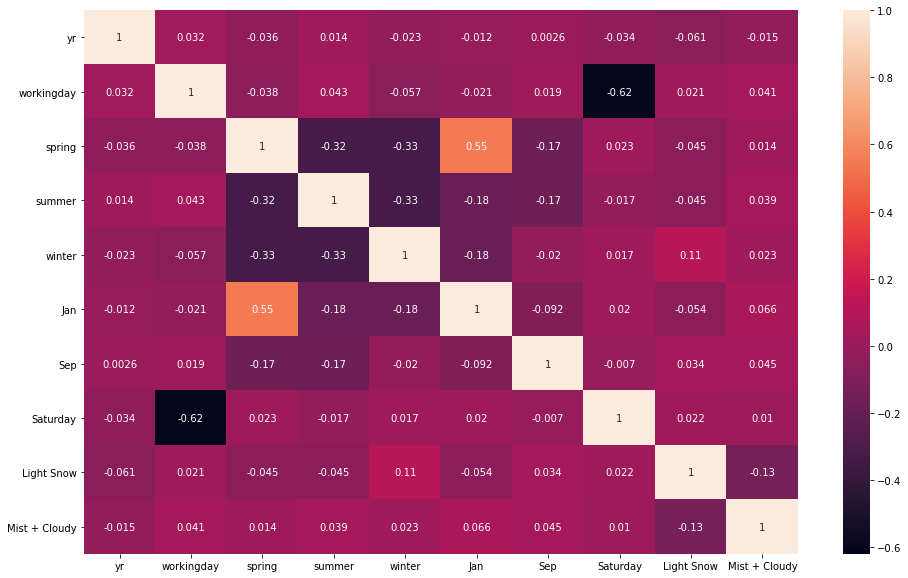

In [581]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X.corr(), annot = True)
plt.show()

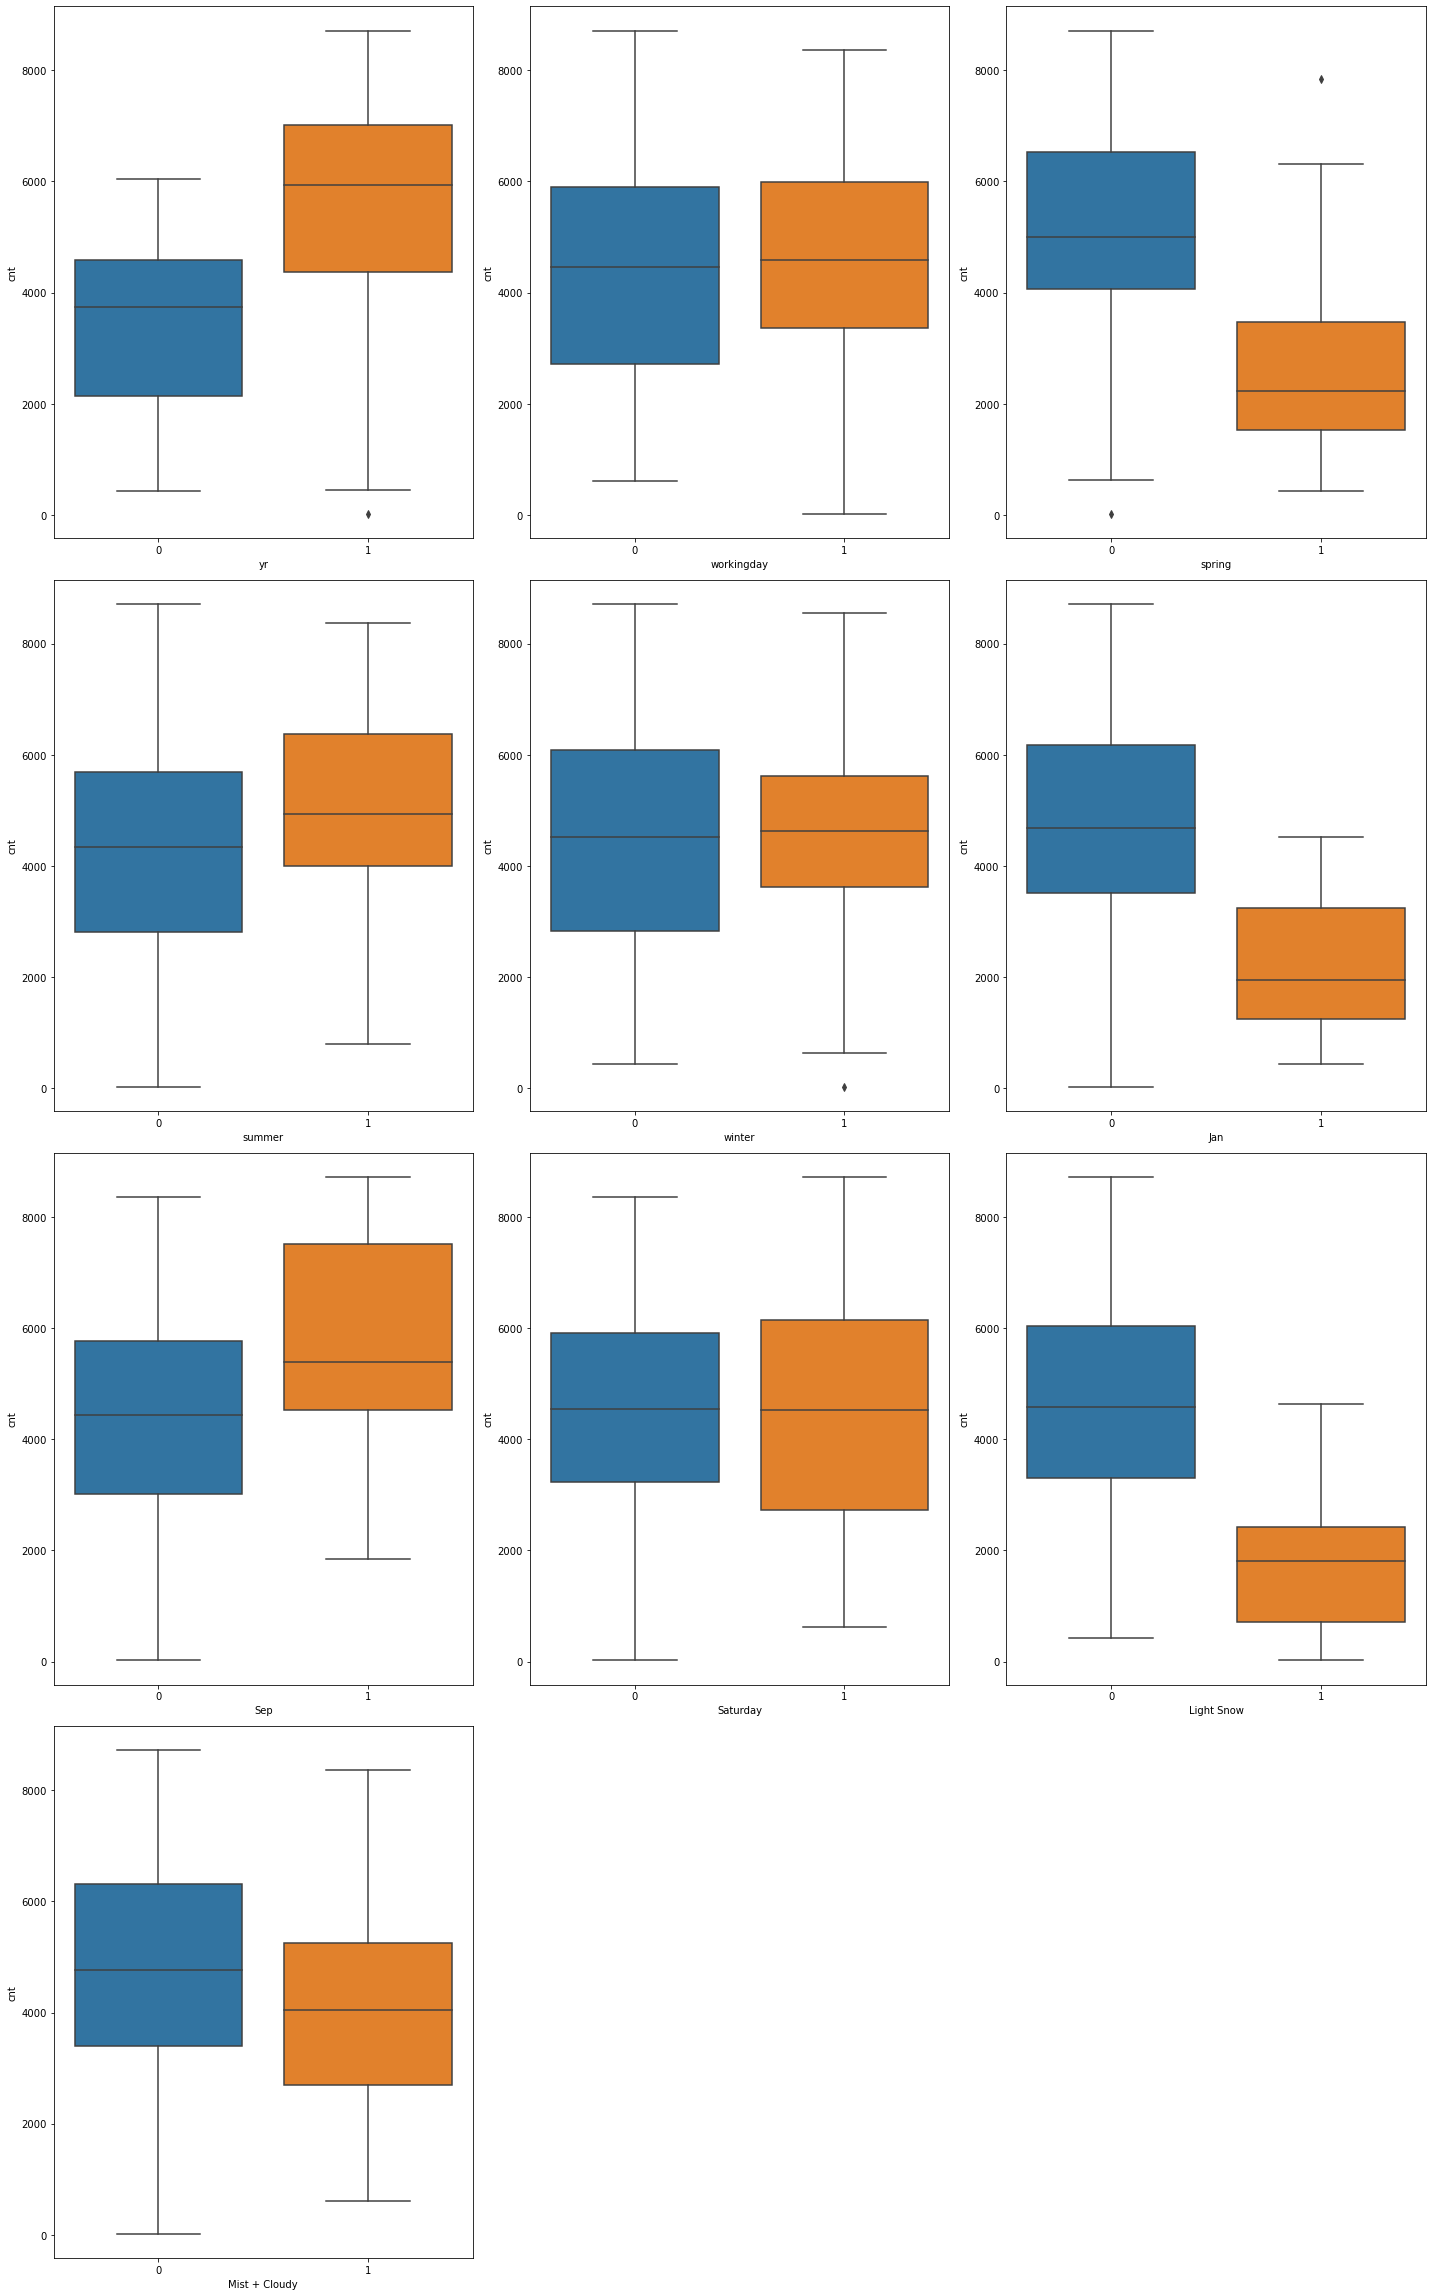

In [582]:
darwPlots(day, X.columns)

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [583]:
y_train_pred = lm.predict(X_train_lm)

Text(0, 0.5, 'y_train_pred')

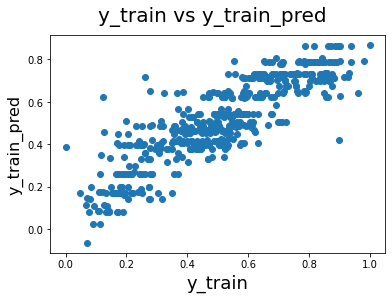

In [584]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16) 

Text(0.5, 0, 'Errors')

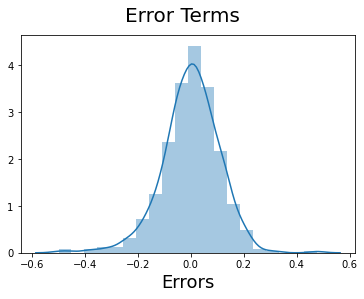

In [585]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### Applying the scaling on the test sets

In [586]:
day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [587]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [588]:
y_test = day_test.pop('cnt')
X_test = day_test

In [589]:
# Creating day_test dataframe by dropping variables from day_test

X_test = X_test[X.columns]

In [590]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [591]:
# Making predictions using the fourth model

y_test_pred = lm.predict(X_test_lm)

## Model Evaluation:

Text(0, 0.5, 'y_pred')

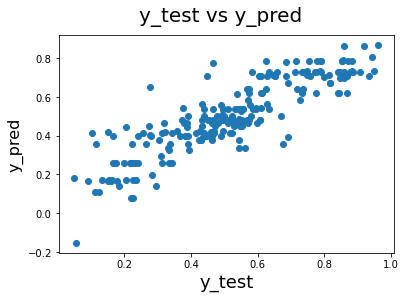

In [592]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [593]:
lm.params

const            0.482085
yr               0.247021
workingday       0.058017
spring          -0.282810
summer          -0.056254
winter          -0.076638
Jan             -0.088767
Sep              0.076432
Saturday         0.062095
Light Snow      -0.321947
Mist + Cloudy   -0.087394
dtype: float64

In [594]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          4.34e-148
Time:                        22:10:26   Log-Likelihood:                 403.55
No. Observations:                 510   AIC:                            -785.1
Df Residuals:                     499   BIC:                            -738.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4821      0.017     29.193      0.000       0.450       0.515
yr                0.2470      0.010     25.049      0.000       0.228       0.266
workingday        0.0580      0.013      4.311      0.000       0.032       0.084
spring           -0.2828      0.016    -17.198      0.000      -0.315      -0.251
summer           -0.0563      0.015     -3.851      0.000      -0.085      -0.028
winter           -0.0766      0.014     -5.369      0.000      -0.105      -0.049
Jan              -0.0888      0.021     -4.274      0.000      -0.130      -0.048
Sep               0.0764      0.019      3.928      0.000       0.038       0.115
Saturday          0.0621      0.017      3.583      0.000       0.028       0.096
Light Snow       -0.3219      0.030    -10.857      0.000      -0.380      -0.264
Mist + Cloudy    -0.0874      0.011     -8.287      0.000      -0.108      -0.067
==============================================================================
Omnibus:                       45.531   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.776
Skew:                          -0.464   Prob(JB):                     8.82e-25
Kurtosis:                       5.086   Cond. No.                         8.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [595]:
# evaluate
from sklearn.metrics import r2_score

### R-squared value for train data

In [596]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.7610580778051351

### R-squared value for test data

In [597]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7519886338213209

### We can see that the equation of our best fitted line is:

### $ cnt = 0.247  \times  yr + 0.058  \times  workingday - 0.2828 \times spring - 0.0563 \times summer - 0.0766 \times winter - 0.0888 \times Jan + 0.0764 \times Sep + 0.062 \times Saturday - 0.3219 \times Light Snow - 0.0874 \times Mist + Cloudy $


## Overall we have a decent model, but we also acknowledge that we could do better. 
